# Holt - Winters Methods

This notebook illustrates Holt-Winters method of exponential smoothing.

## Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
energy_data = pd.read_csv("./EnergyProduction.csv", index_col='DATE', parse_dates=True)

In [5]:
energy_data.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [6]:
energy_data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [7]:
energy_data.index.freq = 'MS'  # set the frequency to MS (month start)

In [8]:
energy_data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

<AxesSubplot:title={'center':'Energy index over time'}, xlabel='DATE'>

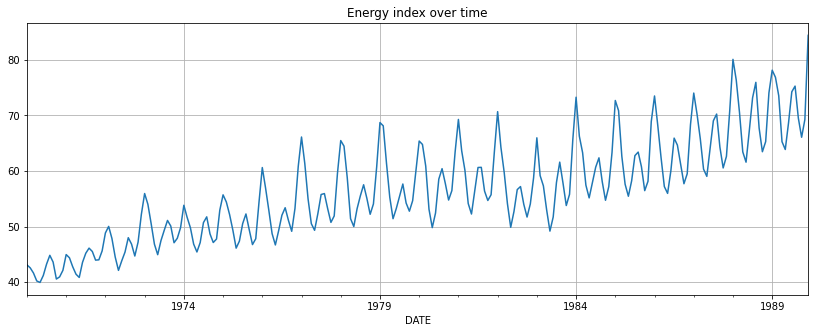

In [10]:
energy_data['EnergyIndex'].plot(figsize=(14,5), grid=True, title='Energy index over time')

## Holt-Winters simple exponential smoothing

We will compare this with normal exponential smoothing method : pandas.DataFrame.ewm()

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [18]:
alpha = 0.6

energy_data['SES'] = SimpleExpSmoothing(energy_data['EnergyIndex']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

C:\Users\SouravKarmakar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [19]:
energy_data['EWMA'] = energy_data['EnergyIndex'].ewm(alpha=alpha).mean()

<IPython.core.display.Javascript object>


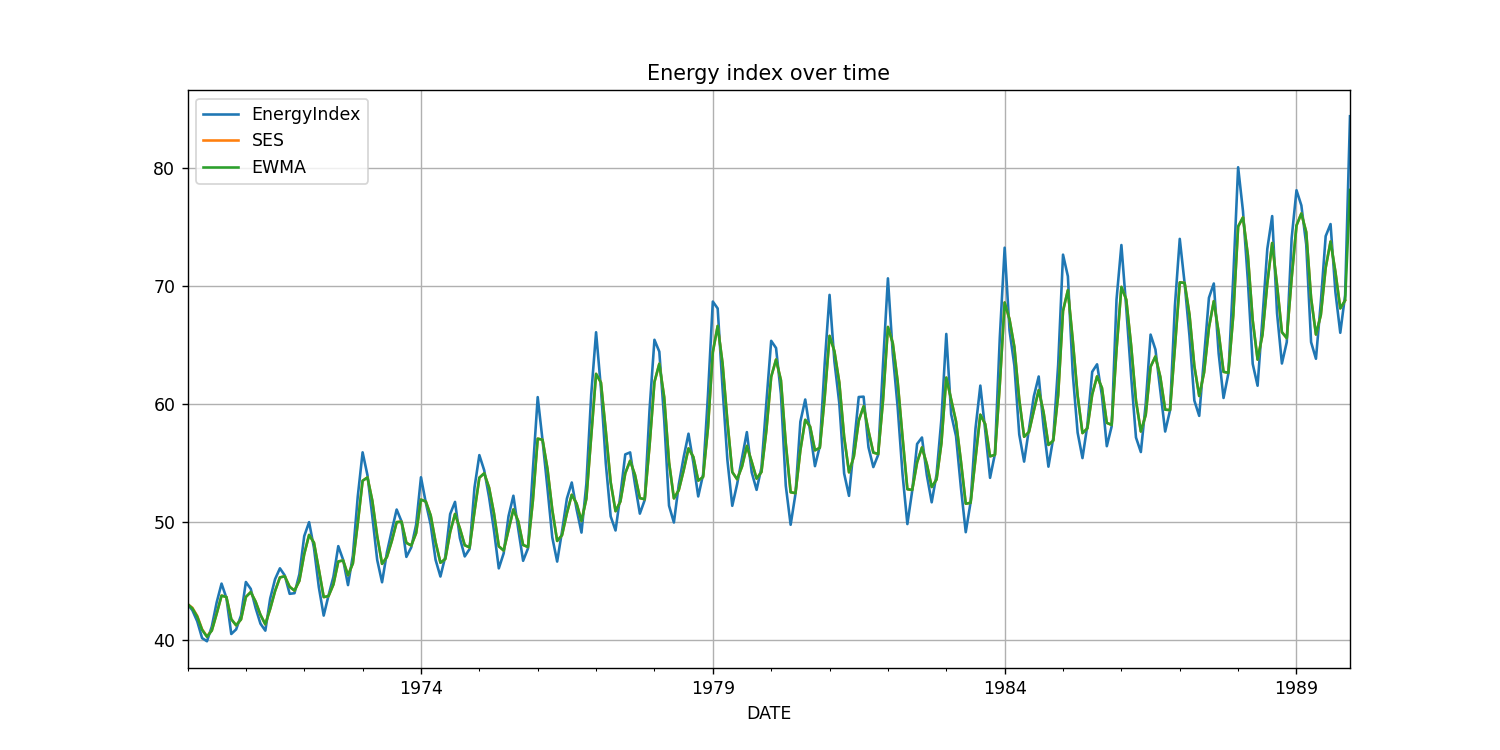

<AxesSubplot:title={'center':'Energy index over time'}, xlabel='DATE'>

In [23]:
%matplotlib notebook
energy_data.plot(figsize=(12,6), grid=True, title='Energy index over time')

In [21]:
energy_data

,EnergyIndex,SES,EWMA
DATE,,,
1970-01-01,43.0869,43.086900,43.086900
1970-02-01,42.5577,42.769380,42.708900
1970-03-01,41.6215,42.080652,42.011849
1970-04-01,40.1982,40.951181,40.895070
1970-05-01,39.9321,40.339732,40.311310
...,...,...,...
1989-08-01,75.2704,73.791869,73.791869
1989-09-01,69.5107,71.223167,71.223167
1989-10-01,66.0620,68.126467,68.126467


## Holt winters double exponential smoothing

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
# additive trend

energy_data['DES_add'] = ExponentialSmoothing(energy_data['EnergyIndex'], trend='add').fit().fittedvalues.shift(-1)

C:\Users\SouravKarmakar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [26]:
# multiplicative trend

energy_data['DES_mul'] = ExponentialSmoothing(energy_data['EnergyIndex'], trend='mul').fit().fittedvalues.shift(-1)

<IPython.core.display.Javascript object>


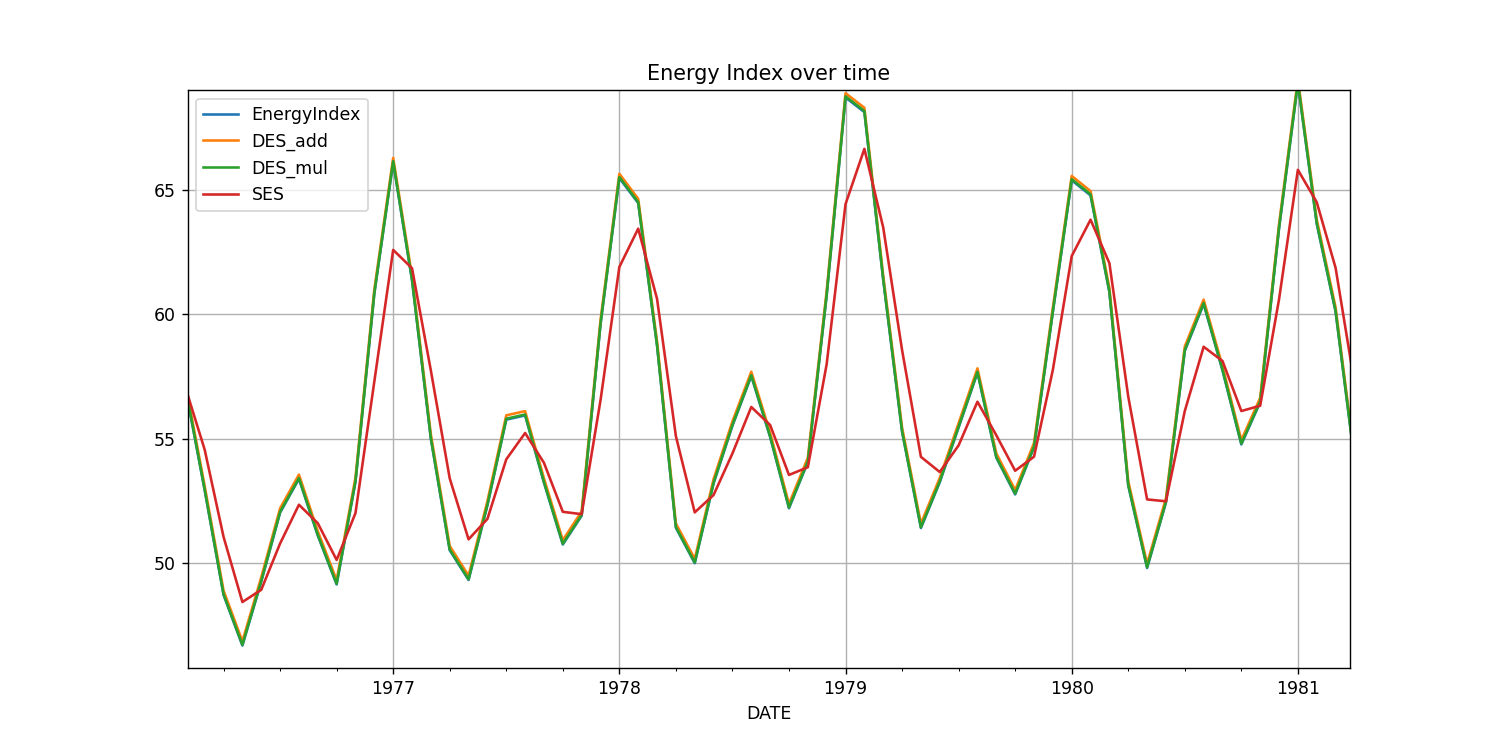

<AxesSubplot:title={'center':'Energy Index over time'}, xlabel='DATE'>

In [27]:
energy_data[['EnergyIndex', 'DES_add', 'DES_mul', 'SES']].plot(figsize=(12,6), grid=True, title='Energy Index over time')

## Holt-Winters triple exponential smoothing

In [29]:
# additive trend and seasonality

energy_data['TES_add'] = ExponentialSmoothing(energy_data['EnergyIndex'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues.shift(-1)

C:\Users\SouravKarmakar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [30]:
# multiplicative trend and seasonality

energy_data['TES_mul'] = ExponentialSmoothing(energy_data['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)

<IPython.core.display.Javascript object>


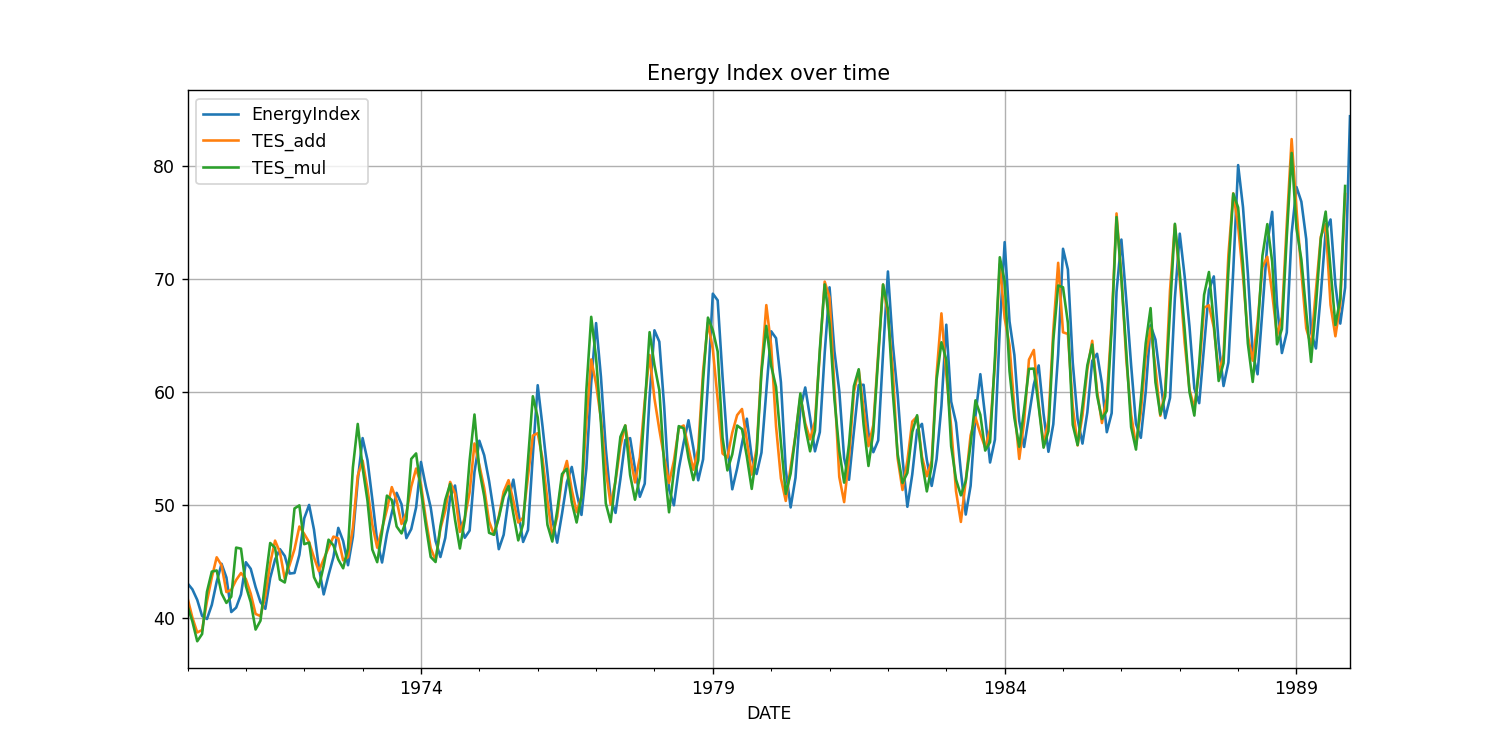

<AxesSubplot:title={'center':'Energy Index over time'}, xlabel='DATE'>

In [31]:
energy_data[['EnergyIndex', 'TES_add', 'TES_mul']].plot(figsize=(12,6), grid=True, title='Energy Index over time')